In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('Data/sentiment_train', delimiter="\t")

# Exploring a Dataset

In [3]:
data.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [4]:
data.shape

(6918, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [6]:
data.describe(include = ['object', 'int64'])

,sentiment,text
count,6918.000000,6918
unique,NaN,1291
top,NaN,I love Harry Potter.
freq,NaN,167
mean,0.569962,NaN
std,0.495117,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN


In our dataset, there are 1291 unique reviews and most frequent one is "I love Harry Potter".

In [7]:
data = data.sample(frac = 1).reset_index(drop = True)

In [8]:
data.head(10)

,sentiment,text
0,0,Brokeback Mountain is fucking horrible..
1,0,My friend said Mission Impossible sucked -- bi...
2,1,I love Brokeback Mountain....
3,0,00 we rode bikes to hollywood and rented broke...
4,0,friday hung out with kelsie and we went and sa...
5,1,I love Harry Potter.
6,0,", she helped me bobbypin my insanely cool hat ..."
7,1,I wanted desperately to love'The Da Vinci Code...
8,1,I love Harry Potter.
9,1,The Da Vinci Code is awesome...


In [9]:
data[data.sentiment == 1][:5]

,sentiment,text
2,1,I love Brokeback Mountain....
5,1,I love Harry Potter.
7,1,I wanted desperately to love'The Da Vinci Code...
8,1,I love Harry Potter.
9,1,The Da Vinci Code is awesome...


In [10]:
data[data.sentiment == 0][:5]

,sentiment,text
0,0,Brokeback Mountain is fucking horrible..
1,0,My friend said Mission Impossible sucked -- bi...
3,0,00 we rode bikes to hollywood and rented broke...
4,0,friday hung out with kelsie and we went and sa...
6,0,", she helped me bobbypin my insanely cool hat ..."


In [11]:
#  number of reviews per sentiment
sen_df = data['sentiment'].value_counts().reset_index()
sen_df['% of reviews'] = sen_df['count'].map(lambda x:(x/sen_df['count'].sum())*100)
sen_df

,sentiment,count,% of reviews
0,1,3943,56.996242
1,0,2975,43.003758


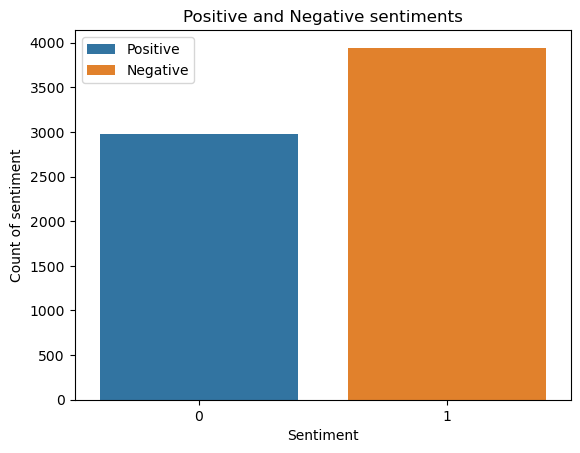

In [12]:
sns.countplot(x = 'sentiment', hue = 'sentiment', dodge = False, data = data)
plt.legend(['Positive', 'Negative'])
plt.title("Positive and Negative sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count of sentiment")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Applying Naive Bayes Model

In [14]:
# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and labels
X_train = train['text']
y_train = train['sentiment']
X_test = test['text']
y_test = test['sentiment']

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes model
model = BernoulliNB()

# Fit the model to the training data
model.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9841040462427746
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       593
           1       0.98      0.99      0.99       791

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



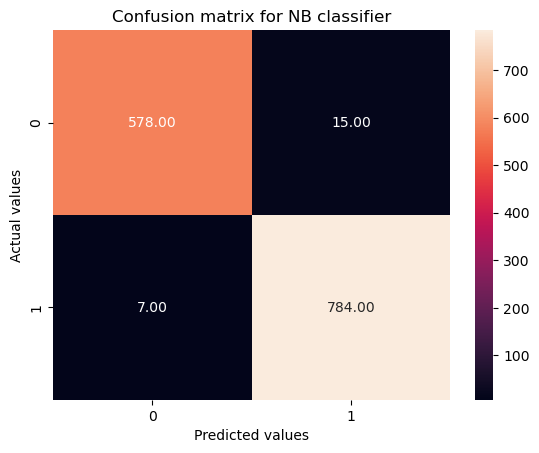

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f')
plt.title('Confusion matrix for NB classifier')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Applying Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_vectorized, y_train)
prediction_log = logistic_reg.predict(X_test_vectorized)
clf_report = classification_report(y_test, prediction_log)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       593
           1       0.99      1.00      0.99       791

    accuracy                           0.99      1384
   macro avg       0.99      0.99      0.99      1384
weighted avg       0.99      0.99      0.99      1384



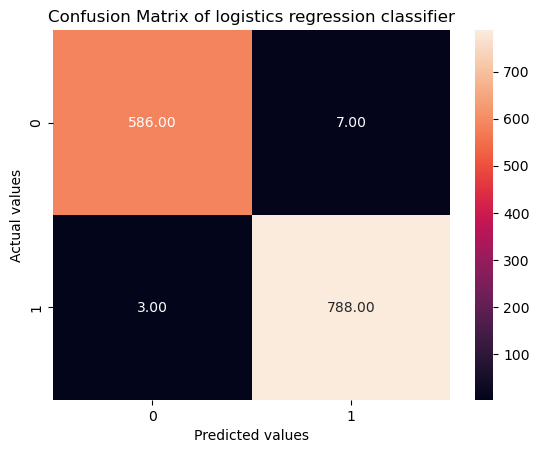

In [18]:
cm_log = confusion_matrix(y_test, prediction_log)
sns.heatmap(cm_log, annot=True, fmt=".2f")
plt.title("Confusion Matrix of logistics regression classifier")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

# Comparing Accuracies 

In [19]:
models = [BernoulliNB(), LogisticRegression()]

In [20]:
accuracy = []
for model in models: 
    cross_val = cross_val_score(model, X_train_vectorized, y_train, scoring = 'accuracy', cv = StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

In [21]:
models_name = ['BernouliNB', 'LogisticRegression']
accuracy_df = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})

In [22]:
accuracy_df

,Model,Accuracy
0,BernouliNB,0.979036
1,LogisticRegression,0.992050
